https://github.com/leahvschaffer/U2OS_music_pipeline

### Load the MuSIC 2, May 2023 model


In [72]:

import os
from file_io import get_model_directory_path
import json

%env MODEL_ANNOTATION_ROOT=Projects/cellmaps_annotate_hierarchy/cellmaps_annotate_hierarchy/

model_name = "MuSIC2_Maps"
version = "May2023"
edge_filename = "muse_imgdim_1024_ppidim_1024_latentd_128_layered.chi_10.maxres_80.alg_leiden.pruned.edges" # the edge file from hidef output
print(get_model_directory_path(model_name, version))
edge_path = os.path.join(get_model_directory_path(model_name, version), edge_filename)
print(edge_path)
# with open(model_path, encoding='utf-8') as f: #code to read cx2 file
#     data = f.read()
#     model = json.loads(data)
# print(model)

env: MODEL_ANNOTATION_ROOT=Projects/cellmaps_annotate_hierarchy/cellmaps_annotate_hierarchy/
/cellar/users/mhu/Projects/cellmaps_annotate_hierarchy/cellmaps_annotate_hierarchy/MuSIC2_Maps/May2023
/cellar/users/mhu/Projects/cellmaps_annotate_hierarchy/cellmaps_annotate_hierarchy/MuSIC2_Maps/May2023/muse_imgdim_1024_ppidim_1024_latentd_128_layered.chi_10.maxres_80.alg_leiden.pruned.edges


### Sort the hierarchy using igraph

In [73]:
# import pandas as pd
# import igraph as ig

# def read_edges(file_name):
#     edges_df = pd.read_csv(file_name, sep='\t', header=None, names=['parent', 'child', 'type'])
#     return edges_df

# def generate_graph(edges_df):
#     graph = ig.Graph.TupleList(edges_df.itertuples(index=False), directed=True)
#     return graph

# def topological_sort(graph):
#     if not graph.is_dag():
#         graph = graph.simplify()
#     sorted_nodes_ids = graph.topological_sorting(mode='in')
#     sorted_nodes_names = [graph.vs[node_index]['name'] for node_index in sorted_nodes_ids]
#     return sorted_nodes_names
    

# def write_sorted_nodes(sorted_nodes, output_file):
#     sorted_nodes_df = pd.DataFrame({'systemID': sorted_nodes})
#     sorted_nodes_df.to_csv(output_file, sep='\t', index=False, header=False)

# edges_df = read_edges(edge_path)
# graph = generate_graph(edges_df)
# sorted_nodes = topological_sort(graph)
# print(sorted_nodes)
# # write_sorted_nodes(sorted_nodes, output_file)

In [74]:
sorted_nodes_file = "U2OSMuSIC_05092023.sorted_nodes"
sorted_nodes_path = os.path.join(get_model_directory_path(model_name, version), sorted_nodes_file)
%run ./topological_sorting.py $edge_path $sorted_nodes_path

In [75]:
# import subprocess
# subprocess.run(['~/miniconda3/envs/r_env/bin/Rscript --vanilla TopologicalSorting.R ' + get_model_directory_path(model_name, version) + ' ' + edge_filename], shell=True) 

## Find the number of unique genes in each parent node

In [23]:
import os
from file_io import get_model_directory_path
import pandas as pd


%env MODEL_ANNOTATION_ROOT=Projects/cellmaps_annotate_hierarchy/cellmaps_annotate_hierarchy/

model_name = "MuSIC2_Maps"
version = "May2023"
file_name = "muse_imgdim_1024_ppidim_1024_latentd_128_layered.chi_10.maxres_80.alg_leiden.pruned"
edge_path = os.path.join(get_model_directory_path(model_name, version), file_name + ".edges")
print(edge_path)
nodes_path = os.path.join(get_model_directory_path(model_name, version), file_name + ".nodes")
print(nodes_path)


node_table = pd.read_csv(nodes_path, sep='\t', header=None, names=['term', 'size', 'genes', 'stability'])
edges_df = pd.read_csv(edge_path, sep='\t', header=None, names=['parent', 'child', 'type'])
# print(node_table.head(), edges_df.head())
print(node_table.shape, edges_df.shape)

env: MODEL_ANNOTATION_ROOT=Projects/cellmaps_annotate_hierarchy/cellmaps_annotate_hierarchy/
/cellar/users/mhu/Projects/cellmaps_annotate_hierarchy/cellmaps_annotate_hierarchy/MuSIC2_Maps/May2023/muse_imgdim_1024_ppidim_1024_latentd_128_layered.chi_10.maxres_80.alg_leiden.pruned.edges
/cellar/users/mhu/Projects/cellmaps_annotate_hierarchy/cellmaps_annotate_hierarchy/MuSIC2_Maps/May2023/muse_imgdim_1024_ppidim_1024_latentd_128_layered.chi_10.maxres_80.alg_leiden.pruned.nodes
(319, 4) (345, 3)


In [24]:
from ontology_modify import find_children, parent_unique_genes, count_children
# count unique genes per parent
unique_genes_per_parent = {}

for parent in edges_df['parent'].unique():
    children = find_children(parent, edges_df)
    unique_genes_count = len(parent_unique_genes(parent, children, node_table))
    unique_genes_per_parent[parent] = unique_genes_count
    print(f"Parent: {parent}, Unique genes count: {unique_genes_count}")

# Count children for each parent node
children_counts = {}
for parent in edges_df['parent'].unique():
    children_counts[parent] = count_children(parent, edges_df)

Parent: Cluster0-0, Unique genes count: 21
Parent: Cluster1-0, Unique genes count: 59
Parent: Cluster1-1, Unique genes count: 36
Parent: Cluster1-2, Unique genes count: 31
Parent: Cluster1-3, Unique genes count: 38
Parent: Cluster1-4, Unique genes count: 84
Parent: Cluster1-5, Unique genes count: 26
Parent: Cluster1-6, Unique genes count: 6
Parent: Cluster1-7, Unique genes count: 34
Parent: Cluster1-8, Unique genes count: 23
Parent: Cluster1-9, Unique genes count: 45
Parent: Cluster1-10, Unique genes count: 14
Parent: Cluster1-11, Unique genes count: 23
Parent: Cluster1-14, Unique genes count: 2
Parent: Cluster1-15, Unique genes count: 9
Parent: Cluster1-16, Unique genes count: 9
Parent: Cluster1-17, Unique genes count: 16
Parent: Cluster1-18, Unique genes count: 7
Parent: Cluster1-19, Unique genes count: 6
Parent: Cluster1-20, Unique genes count: 5
Parent: Cluster1-25, Unique genes count: 3
Parent: Cluster1-28, Unique genes count: 3
Parent: Cluster2-0, Unique genes count: 61
Parent: C

In [78]:
print(sorted(unique_genes_per_parent.items(), key=lambda x: x[1], reverse=True))
# len(unique_genes_per_parent)

[('Cluster3-2', 389), ('Cluster3-0', 226), ('Cluster3-4', 218), ('Cluster3-5', 171), ('Cluster4-2', 163), ('Cluster2-7', 150), ('Cluster3-1', 143), ('Cluster3-6', 114), ('Cluster2-8', 111), ('Cluster2-9', 97), ('Cluster2-5', 93), ('Cluster4-1', 86), ('Cluster1-4', 84), ('Cluster5-3', 79), ('Cluster3-3', 72), ('Cluster5-2', 71), ('Cluster2-1', 70), ('Cluster3-8', 70), ('Cluster3-11', 67), ('Cluster3-7', 66), ('Cluster4-8', 65), ('Cluster2-2', 64), ('Cluster2-0', 61), ('Cluster1-0', 59), ('Cluster4-0', 56), ('Cluster2-10', 52), ('Cluster2-4', 50), ('Cluster3-10', 47), ('Cluster1-9', 45), ('Cluster2-15', 44), ('Cluster5-1', 44), ('Cluster5-9', 43), ('Cluster6-1', 42), ('Cluster2-6', 40), ('Cluster4-7', 39), ('Cluster1-3', 38), ('Cluster4-13', 38), ('Cluster5-5', 38), ('Cluster1-1', 36), ('Cluster5-6', 35), ('Cluster1-7', 34), ('Cluster4-6', 34), ('Cluster1-2', 31), ('Cluster2-14', 31), ('Cluster4-5', 31), ('Cluster4-4', 30), ('Cluster4-17', 29), ('Cluster2-22', 28), ('Cluster4-3', 28), ('

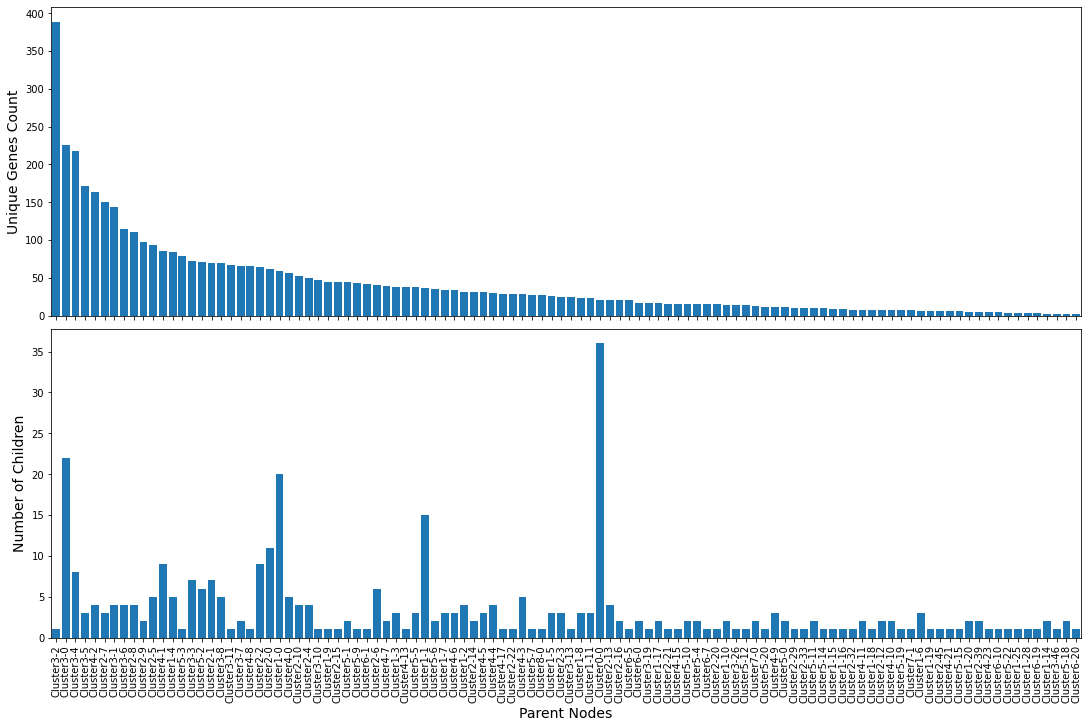

In [90]:
import matplotlib.pyplot as plt
# Sort the dictionary by items
sorted_unique_genes =sorted(unique_genes_per_parent.items(), key=lambda x: x[1], reverse=True)
sorted_children_counts = sorted(children_counts.items(), key=lambda x: x[1], reverse=True)
# Prepare data for the first plot (unique genes per parent)
x_labels_1 = [item[0] for item in sorted_unique_genes]
y_values_1 = [item[1] for item in sorted_unique_genes]

# Prepare data for the second plot (number of children per parent)
x_labels_2 = [item[0] for item in sorted_children_counts]
y_values_2 = [item[1] for item in sorted_children_counts]

# Create the plots
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15, 10), sharex=True, constrained_layout=True)

# Create the first plot (unique genes per parent)
ax1.bar(x_labels_1, y_values_1)
ax1.set_ylabel('Unique Genes Count', fontsize=14)
ax1.set_xlim(-0.5, len(x_labels_1) - 0.5)

# Create the second plot (number of children per parent)
ax2.bar(x_labels_2, y_values_2)
ax2.set_xlabel('Parent Nodes', fontsize=14)
ax2.set_ylabel('Number of Children', fontsize=14)
ax2.set_xlim(-0.5, len(x_labels_2) - 0.5)

# Rotate x-axis labels for both plots
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)

# Show the combined plots
plt.show()

## Ideas to split the large parent node

Divide the large parent into three groups (skip root node)

**Group 1:** Unique genes < = 10 (>0)

* Keep as is, when creating prompt use the unique gene list (GO annotations, disease etc) + summaries from child nodes 

**Group 2:** Unique genes > 10 and <50

* Create one stepchild node to the ontology (update both edges and nodes table)

* Query summary for stepchild and child nodes

* Create a prompt with summaries from all child nodes and stepchild

**Group 3:** Unique genes >= 50

* Run k means clustering and keep each cluster size < 45

* Add stepchild node for each cluster 

* Query for all stepchild and child nodes 

* Prompt for all summaries 

NOTE: after creating stepchild nodes → check again for the number of children → if the number of children > 20? (Skip for now)


Location of the muse embedding output 

/cellar/users/lvschaffer/Data/MuSIC/U2OS/coembedding/muse_pytorch/new_embeddings/U2OS_music_pipeline/outputs_run_muse_integration/muse_imgdim_1024_ppidim_1024_latentd_128_latent.txt

In [22]:
## functions:
import pandas as pd 
from sklearn.cluster import KMeans


# Function to generate step child node names for k-means clusters
def generate_step_child(parent, num_clusters):
    return [f"{parent}_{i}" for i in range(1, num_clusters + 1)]

# Function to perform k-means clustering on unique genes
def perform_kmeans_clustering(unique_genes, embedding_file, average_genes_per_cluster=30, max_genes_per_cluster=50):
    emb = pd.read_csv(embedding_file, sep=',', index_col=0)
    gene_embedding = emb.loc[unique_genes].values
    num_genes= len(unique_genes)
    num_clusters = int(num_genes/average_genes_per_cluster) # I want average 30 genes per cluster

    # Perform k-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(gene_embedding)
    cluster_labels = kmeans.labels_
    # update the genes_per_cluster using the maximum number of genes in a cluster
    genes_per_cluster = max(pd.Series(cluster_labels).value_counts())

    # when the number of genes per cluster is greater than the max_genes_per_cluster, increase the number of clusters until the condition is met
    if genes_per_cluster > max_genes_per_cluster:
        print(f'There is a big cluster with genes more than {max_genes_per_cluster}, add one more cluster')
        num_clusters += 1
        kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(gene_embedding)
        cluster_labels = kmeans.labels_
        #update the genes_per_cluster using the maximum number of genes in a cluster
        genes_per_cluster = max(pd.Series(cluster_labels).value_counts())

    return cluster_labels, num_clusters

In [25]:
## create groups of parents
group_1_parents = [parent for parent, count in unique_genes_per_parent.items() if count <= 10]
group_2_parents = [parent for parent, count in unique_genes_per_parent.items() if 10 < count < 50]
group_3_parents = [parent for parent, count in unique_genes_per_parent.items() if count >= 50]
print(len(group_1_parents), len(group_2_parents), len(group_3_parents))

parents_by_group = {
    'group_1': group_1_parents,
    'group_2': group_2_parents,
    'group_3': group_3_parents
}

import json
import os 
from file_io import get_model_directory_path

model_name = "MuSIC2_Maps"
version = "May2023"

# Save the parents_by_group dictionary as a JSON file
with open(os.path.join(get_model_directory_path(model_name, version),'parent_nodes_by_group.json'), 'w') as f:
    json.dump(parents_by_group, f)


30 49 27


In [26]:
# Create a function to return the unique genes list for a parent node
def get_unique_genes_list(node, edges, nodes):
    if node not in edges['parent'].unique():
        return ''

    children = find_children(node, edges)
    unique_genes = parent_unique_genes(node, children, nodes)
    return ' '.join(unique_genes)

# Add a new column to the nodes_copy DataFrame with the unique genes list
nodes_copy = node_table.copy()
nodes_copy['unique_genes'] = nodes_copy['term'].apply(lambda x: get_unique_genes_list(x, edges_df, node_table))


nodes_copy.head()
# copy the edges dataframe
edges_copy = edges_df.copy()
# generate step child node from unique genes 

for parent in group_2_parents:
    step_child = generate_step_child(parent, 1)
    unique_genes_list = nodes_copy.loc[nodes_copy['term'] == parent, 'unique_genes'].values[0]
    # print(unique_genes_list)
    # Create a new row for the step child in the nodes DataFrame
    step_child_row = pd.DataFrame({'term': step_child, 'genes': [unique_genes_list]})
    nodes_copy = nodes_copy.append(step_child_row, ignore_index=True)

    # # Update the edges DataFrame to include the new stepchild node
    new_edge_row = pd.DataFrame({'parent': parent, 'child': step_child, 'type': ['default']})
    edges_copy = edges_copy.append(new_edge_row, ignore_index=True)

print(nodes_copy.head(), edges_copy.head())

         term    size                                              genes  \
0  Cluster0-0  5254.0  SLFN11 VPS11 CCNB1 FTSJ1 MEX3C TBCC SYTL5 PIDD...   
1  Cluster1-0  2652.0  DOCK10 ANKRD54 MAGI1 HOMER3 TJP1 CSPP1 PLEC RT...   
2  Cluster1-1  2150.0  DOCK10 RTCB PRKD2 PPP2R5D CTNND2 CREB1 ECD CDK...   
3  Cluster2-0  1890.0  FAAP24 ARL4C ANXA9 BPNT1 EEF1B2 LRRC42 HERC4 T...   
4  Cluster3-0  1340.0  FAAP24 ANXA9 BPNT1 MRFAP1 FBXO45 SYCE1 DAPK3 Z...   

   stability                                       unique_genes  
0       88.0  MAP4K5 VPS11 NQO2 CDPF1 ABLIM1 SYTL5 USP13 SNX...  
1       14.0  MISP MYO1E TJP1 CCDC8 SEC23B ENTREP3 TRIM62 HD...  
2       15.0  IL13RA2 RFFL BORCS8 MYO19 BIRC6 RNF181 SNAPIN ...  
3       26.0  SRPK1 B3GNTL1 ZNF526 YBEY RCC1 POC5 DDX60L PCY...  
4       36.0  SKIC8 CCDC82 CREBRF EIF3B KDM1B TLNRD1 SECISBP...          parent       child     type
0  Cluster0-0  Cluster1-0  default
1  Cluster0-0  Cluster1-1  default
2  Cluster0-0  Cluster1-2  default
3  Clus

In [27]:
# the embedding file from muse output (use for clustering)
emb = '/cellar/users/lvschaffer/Data/MuSIC/U2OS/coembedding/muse_pytorch/new_embeddings/U2OS_music_pipeline/outputs_run_muse_integration/muse_imgdim_1024_ppidim_1024_latentd_128_latent.txt'
parent_clusters = {}
for parent in group_3_parents:
    print(f'Run k-means clustering on {parent}')
    unique_genes_list = nodes_copy.loc[nodes_copy['term'] == parent, 'unique_genes'].values[0].split()

    cluster_labels, num_clusters = perform_kmeans_clustering(unique_genes_list, emb)
    # print(f"{parent}: ", cluster_labels, num_clusters)
    step_child_names = generate_step_child(parent, num_clusters)
    parent_clusters[parent] = num_clusters
    print(f"{parent} with unique genes of {len(unique_genes_list)} splits into {num_clusters} clusters")
    for idx, step_child in enumerate(step_child_names):
        genes_in_cluster = ' '.join([gene for i, gene in enumerate(unique_genes_list) if cluster_labels[i] == idx])

        # Create a new row for the step child in the nodes DataFrame
 
        step_child_row = pd.DataFrame({'term': step_child, 'genes': [genes_in_cluster]})
        nodes_copy = nodes_copy.append(step_child_row, ignore_index=True)

        # Update the edges DataFrame to include the new step child node
        new_edge_row = pd.DataFrame({'parent': parent, 'child': step_child, 'type': ['default']})
        edges_copy = edges_copy.append(new_edge_row, ignore_index=True)

print(nodes_copy.tail(), edges_copy.tail())

Run k-means clustering on Cluster1-0
There is a big cluster with genes more than 50, add one more cluster
Cluster1-0 with unique genes of 59 splits into 2 clusters
Run k-means clustering on Cluster1-4
Cluster1-4 with unique genes of 84 splits into 2 clusters
Run k-means clustering on Cluster2-0
Cluster2-0 with unique genes of 61 splits into 2 clusters
Run k-means clustering on Cluster2-7
Cluster2-7 with unique genes of 150 splits into 5 clusters
Run k-means clustering on Cluster2-9
Cluster2-9 with unique genes of 97 splits into 3 clusters
Run k-means clustering on Cluster2-10
There is a big cluster with genes more than 50, add one more cluster
Cluster2-10 with unique genes of 52 splits into 2 clusters
Run k-means clustering on Cluster2-1
Cluster2-1 with unique genes of 70 splits into 2 clusters
Run k-means clustering on Cluster2-2
Cluster2-2 with unique genes of 64 splits into 2 clusters
Run k-means clustering on Cluster2-4
Cluster2-4 with unique genes of 50 splits into 1 clusters
Run 

In [28]:
import os
from file_io import get_model_directory_path

model_name = "MuSIC2_Maps"
version = "May2023"
file_name = "muse_imgdim_1024_ppidim_1024_latentd_128_layered.chi_10.maxres_80.alg_leiden.pruned"

nodes_copy.to_csv(os.path.join(get_model_directory_path(model_name, version), f'{file_name}.expand.nodes'), sep = '\t', index=False, header=False)
edges_copy.to_csv(os.path.join(get_model_directory_path(model_name, version), f'{file_name}.expand.edges'), sep = '\t', index=False, header=False)

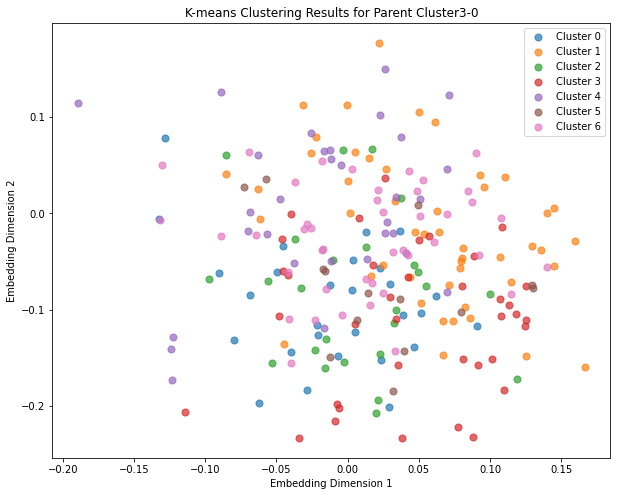

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
emb = '/cellar/users/lvschaffer/Data/MuSIC/U2OS/coembedding/muse_pytorch/new_embeddings/U2OS_music_pipeline/outputs_run_muse_integration/muse_imgdim_1024_ppidim_1024_latentd_128_latent.txt'
# Choose a parent from group 3
selected_parent = 'Cluster3-0'

# Run k-means clustering for the selected parent
unique_genes_list = nodes_copy.loc[nodes_copy['term'] == selected_parent, 'unique_genes'].values[0].split()
cluster_labels, _ = perform_kmeans_clustering(unique_genes_list, emb)

# Extract the embeddings of the genes
embedding = pd.read_csv(emb, sep=',', index_col=0)
gene_embedding = embedding.loc[unique_genes_list].values

# Create a scatter plot of the embeddings, color-coded by cluster assignment
plt.figure(figsize=(10, 8))
# Find the unique cluster labels
unique_cluster_labels = np.unique(cluster_labels)

# Plot each cluster separately and assign a label to each of them
for cluster_label in unique_cluster_labels:
    idx = cluster_labels == cluster_label
    plt.scatter(gene_embedding[idx, 0], gene_embedding[idx, 1], label=f'Cluster {cluster_label}', s=50, alpha=0.7)

# Customize plot labels and title
plt.xlabel("Embedding Dimension 1")
plt.ylabel("Embedding Dimension 2")
plt.title(f"K-means Clustering Results for Parent {selected_parent}")

# Show the legend
plt.legend()

plt.show()


### Run the number of child code again to check the number of child 

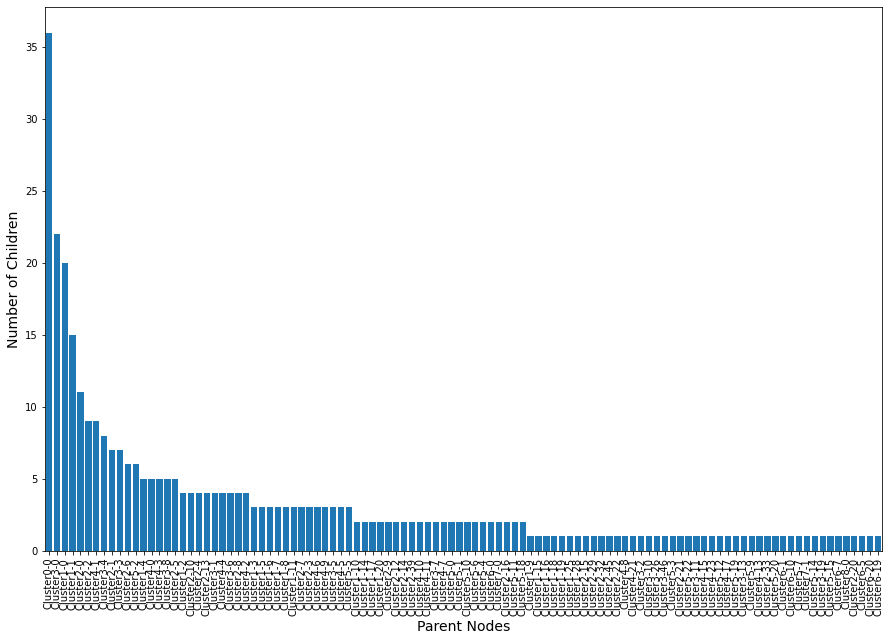

In [39]:
from ontology_modify import count_children
import matplotlib.pyplot as plt

# Count children for each parent node
children_counts_new = {}
for parent in edges_df['parent'].unique():
    children_counts_new[parent] = count_children(parent, edges_df)

# Sort the dictionary by items
sorted_children_counts_new = sorted(children_counts_new.items(), key=lambda x: x[1], reverse=True)

# Prepare data for the second plot (number of children per parent)
x_labels = [item[0] for item in sorted_children_counts_new]
y_values = [item[1] for item in sorted_children_counts_new]

# Create the plots
fig, ax = plt.subplots(figsize=(15, 10))

# Create the second plot (number of children per parent)
ax.bar(x_labels, y_values)
ax.set_xlabel('Parent Nodes', fontsize=14)
ax.set_ylabel('Number of Children', fontsize=14)
ax.set_xlim(-0.5, len(x_labels) - 0.5)

# Rotate x-axis labels for both plots
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

# Show the combined plots
plt.show()

# Pick one branch as an example for running the loop 

In [57]:
## Pick an example lineage to test the loop

lineage = 'Cluster1-2' ## is a parent from group 2 and 3
#lineage2 = 'Cluster1-18' ## is a parent from group 1

# edge file 
import os
from file_io import get_model_directory_path
import pandas as pd
os.environ['MODEL_ANNOTATION_ROOT'] = 'Projects/cellmaps_annotate_hierarchy/cellmaps_annotate_hierarchy/'
 
model_name = "MuSIC2_Maps"
version = "May2023"
file_name = "muse_imgdim_1024_ppidim_1024_latentd_128_layered.chi_10.maxres_80.alg_leiden.pruned"

edges = pd.read_csv(os.path.join(get_model_directory_path(model_name, version), f'{file_name}.expand.edges'), sep = '\t', names = ['parent', 'child', 'type'])
edges.head()
# Get all the descendant of the lineage
def get_descendants(lineage, edges):
    descendants = []
    children = edges.loc[edges['parent'] == lineage, 'child'].values
    descendants.extend(children)
    for child in children:
        descendants.extend(get_descendants(child, edges))
    return descendants

descendants = get_descendants(lineage, edges)
print(f"Number of descendants for {lineage}: {len(descendants)}")

# get the sub edge table with this lineage 
subbranch = [lineage] + descendants
sub_edges = edges.loc[edges['parent'].isin(subbranch) & edges['child'].isin(subbranch)]
sub_edges.to_csv(os.path.join(get_model_directory_path(model_name, version), f'{file_name}.expand.sub_edges_1-2'), sep = '\t', index=False, header=False)

Number of descendants for Cluster1-2: 24


### Step 1: sort the branch 

In [65]:
sorted_nodes_file = "U2OSMuSIC_may2023_lineage1-2.sorted_nodes"
sorted_nodes_path = os.path.join(get_model_directory_path(model_name, version), sorted_nodes_file)
subedges = os.path.join(get_model_directory_path(model_name, version), f'{file_name}.expand.sub_edges_1-2')
%run ./topological_sorting.py $subedges $sorted_nodes_path

## Step 2: loop through the systems 


In [71]:
from file_io import get_root_path, read_system_json
# need sub_edges file, nodes file, sorted_nodes file, and parent group number
sub_edges = pd.read_csv(subedges, sep = '\t', names = ['parent', 'child', 'type'])
nodes_table = pd.read_csv(os.path.join(get_model_directory_path(model_name, version), f'{file_name}.expand.nodes'), sep = '\t', names = ['term','size', 'genes','stability', 'unique_genes'])
# open the sorted nodes file as a list
with open(sorted_nodes_path, 'r') as f:
    sorted_nodes = f.read().splitlines()

# load parent group 
with open(os.path.join(get_model_directory_path(model_name, version),'parent_nodes_by_group.json'), 'r') as f:
    parent_group = json.load(f)

for node in sorted_nodes:
    # check if is leaf node 
    if node not in sub_edges['parent'].values:
        # print(f"{node} is a leaf node")
        # TODO: run prompt generation and collect the results
        continue
    # check if is parent node
    elif node in sub_edges['parent'].values:
        # get child list 
        children = find_children(node, sub_edges)
        if len(children) >=20:
            # print(f"{node} is a parent node with more than 20 children")
            continue
        elif node in parent_group['group1']:
            # print(f"{node} is a parent node from group 1")
            # TODO: get prompt for unique genes 
            
            
            # TODO: concate results from children
            continue
        elif node in parent_group['group2'] or node in parent_group['group3']:
            # print(f"{node} is a parent node from group 2 or 3")
            # TODO: concate results from all children
            continue


#TODO a function to concatenate the summaries from all children 
def concat_children_summary(model_name, version, children, file_name):
    '''file_name is the prefix of the nodes/edges file'''
    nodes_table = pd.read_csv(
        os.path.join(get_model_directory_path(model_name, version), f'{file_name}.expand.nodes'), sep = '\t', names = ['term','size', 'genes','stability', 'unique_genes'])
    summary_string = ""
    for child in children: 
        # go to the folder with the child name get the summary file
        summary = read_system_json(model_name, version, child, 'analysis', get_root_path())

        


,term,size,genes,stability,unique_genes
0,Cluster0-0,5254.0,SLFN11 VPS11 CCNB1 FTSJ1 MEX3C TBCC SYTL5 PIDD...,88.0,MAP4K5 VPS11 NQO2 CDPF1 ABLIM1 SYTL5 USP13 SNX...
1,Cluster1-0,2652.0,DOCK10 ANKRD54 MAGI1 HOMER3 TJP1 CSPP1 PLEC RT...,14.0,MISP MYO1E TJP1 CCDC8 SEC23B ENTREP3 TRIM62 HD...
2,Cluster1-1,2150.0,DOCK10 RTCB PRKD2 PPP2R5D CTNND2 CREB1 ECD CDK...,15.0,IL13RA2 RFFL BORCS8 MYO19 BIRC6 RNF181 SNAPIN ...
3,Cluster2-0,1890.0,FAAP24 ARL4C ANXA9 BPNT1 EEF1B2 LRRC42 HERC4 T...,26.0,SRPK1 B3GNTL1 ZNF526 YBEY RCC1 POC5 DDX60L PCY...
4,Cluster3-0,1340.0,FAAP24 ANXA9 BPNT1 MRFAP1 FBXO45 SYCE1 DAPK3 Z...,36.0,SKIC8 CCDC82 CREBRF EIF3B KDM1B TLNRD1 SECISBP...
...,...,...,...,...,...
459,Cluster3-11_1,NaN,SMS PSPH IDH1 TTC1 ISL2 PDLIM2 RELA MVD STAM2 ...,NaN,NaN
460,Cluster3-11_2,NaN,LGALS9 EEF1A2 SH3GL1 CARS1 UROD CHORDC1 BIN1 D...,NaN,NaN
461,Cluster3-11_3,NaN,MEAK7 RRM1 NARS1 TKFC MAP2K1 FERMT2 FHL1 CNPY2...,NaN,NaN
462,Cluster5-2_1,NaN,FLOT2 PRKAA2 GSKIP CLASP2 S100B TRIP11 POLB CH...,NaN,NaN
